<a href="https://colab.research.google.com/github/prakashiris/feature_extraction_of_audio_signals/blob/master/feature_extraction_of_audio_signals_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#install packages
!pip install librosa
!pip install wave
!pip install scipy
!pip install pydub
!pip install  soundfile
!pip install pygobject
!pip install Audio

  Using cached https://files.pythonhosted.org/packages/b6/20/8159c4dea7d20fd8781984753110f0227b24b7c5d3bc4608a98af4272e9e/audio-1.5.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/73/96/d9385d60f7ee1b7bc66711cf618918d0fccb60e85449628defd5fc812a30/audio.bitstream-2.5.4.tar.gz
  Using cached https://files.pythonhosted.org/packages/4a/8d/d4fe457f6587005e8a4bd4597a12ceb4033e7557dc551b252451c6886967/audio.coders-4.0.2.tar.gz
Command "python setup.py egg_info" failed with error code 1 in /tmp/pip-install-n80z1y1j/audio.coders/


In [0]:
#library import
import math
import wave
import scipy
import librosa
import numpy as np
import librosa.display
import soundfile as sf
from pydub import AudioSegment
from google.colab import files
import matplotlib.pyplot as plt
from IPython.display import Audio
from pydub.utils import db_to_float
from pydub.silence import split_on_silence
from pydub.silence import detect_silence

In [0]:
#Uploading human.wav audio  file from local storage
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving human.wav to human.wav
User uploaded file "human.wav" with length 1224492 bytes


In [0]:
#Loading data
fileName = 'human.wav'
data, sampling_rate  = librosa.core.load(fileName)
#Playing the audio 
Audio(data = data,rate = sampling_rate)

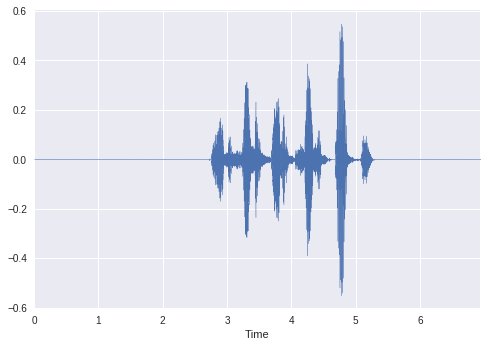

In [0]:
#waveplot
librosa.display.waveplot(data, sampling_rate)

In [0]:
# Duration : Total duration of the audio
total_samples = data.size
total_duration = int(total_samples/sampling_rate)


6

In [0]:
# Fourier Transform from data 

fourier_transform = np.fft.rfft(data)

# Frequencies

frequencies = np.abs(fourier_transform)

# Maximum Pitch

max_pitch = np.argmax(frequencies)


16975

In [0]:
arr = [117]*len(frequencies)

sum_freq = 0

for i in range(0,len(frequencies)):
    if int(frequencies[i])>0 and int(frequencies[i])<int(max_pitch):
        arr[i] = int(frequencies[i])
        sum_freq=sum_freq + i

In [0]:
# Minmum Pitch
min_pitch = arr.index(min(arr))



720

In [0]:
# Mean pitch
mean_pitch=sum_freq/len(frequencies)


24226.693384207294

In [0]:

#total energy
energy= np.sum(data**2)
energy_freq = np.sum(frequencies**2)/total_samples
#power
power = energy / total_duration



15.590882619222006

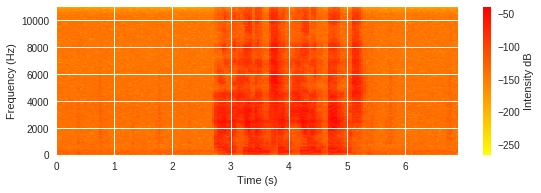

In [0]:
plt.figure(1, figsize=(9,6))
plt.subplot(211)
#IntensityMin : Minimum Intensity of the audio signal
Pxx, freqs, bins, im = plt.specgram(data, Fs = sampling_rate, NFFT=1024, cmap=plt.get_cmap('autumn_r'))
col_bar=plt.colorbar(im)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
col_bar.set_label('Intensity dB')
plt.show()
plt.close()

In [0]:
#minimum intensity
min_intensity = col_bar.vmin
min_intensity

-266.15718572457047

In [0]:
#maximum intensity
max_intensity = col_bar.vmax
max_intensity

-39.10700921096199

In [0]:
#mean intensity
mean_intensity = (min_intensity + max_intensity) / 2
mean_intensity

-152.63209746776624

In [0]:
sound = AudioSegment.from_wav("human.wav")
len(sound)

6941

In [0]:
chunks = split_on_silence(sound, 
    # must be silent for at least half a second
    min_silence_len=20,

    # consider it silent if quieter than -16 dBFS
    silence_thresh=-(round(abs(sound.dBFS))+100)
)



#1000 means 1 sec then 60 second means
sixty_seconds = 60 * 1000

second_1_minute = sound[sixty_seconds:120000]
hunks = split_on_silence(second_1_minute, 
    # must be silent for at least half a second
    min_silence_len=20,

    # consider it silent if quieter than -16 dBFS
    silence_thresh=-(round(abs(sound.dBFS))+100)
)

In [0]:
#SPEAKING RATE
speaking_rate=len(hunks)/len(chunks)

In [0]:
#SILENCES
pauses=detect_silence(sound, min_silence_len=20, silence_thresh=-(round(abs(sound.dBFS))+100), seek_step=1)

#FINDING DURATIONS
sumd=0
ls=[]
for start_i, end_i in pauses:
         dur=int(end_i)-int(start_i)
         ls.append(dur)
breaks=[]

#VOICE BREAKS
for i in ls:
    if i >900:
        breaks.append(i)
#SEPRATING BREAKES AND PAUSES
ls=list(set(ls)-set(breaks))

In [0]:
#PUASES DURATION
for i in ls:
    sumd=sumd+i

In [0]:
#TOTAL DURATION OF PAUSES
durp=sumd



In [0]:
#NO OF PAUSES
nop=len(ls)

In [0]:
#NO OF VOICE BREAKES
noofVoiceBreaks=len(breaks)

In [0]:
#MAXIMUM DURATION OF PAUSES
maximum_pause=max(ls)

In [0]:
#AVG DURATION OF PAUSES
avgp=durp/nop

In [0]:
#FINDING PEAK
peak=scipy.signal.find_peaks(data,rel_height=0.5)

In [0]:
#MAXIMUM FALLING AND MAXIMUM RISING

MaxFalling=np.amin(data)
MaxRising=np.amax(peak[0])
sums=0

In [0]:

#JITTER, SHIMMER, JITTERRAP 
for i in range(1,len(peak[0])-1):
    sums=sums+abs(20*math.log10(peak[0][i+1]/peak[0][i]))

#SHIMMER
shimmer=sums/(len(peak[0])-1)
peakf=abs(np.fft.fft(peak[0]))
sumps=0
for i in range(1,len(peakf)-1):
    sumps=sumps+(peakf[i+1]**-1)-(peakf[i]**-1)

#JITTER
jitter=sumps/(len(peakf)-1)
sortedp=np.sort(peak[0])
sortedf=abs(np.fft.fft(sortedp))
dif=abs(sortedp[11]-sortedp[15])
suh=0
avgabsdiff=(dif)/4
avgneigh1=(abs(sortedp[6]-sortedp[10]))
avgneigh2=abs(sortedp[17]-sortedp[22])
avg=(dif+avgneigh1+avgneigh2)/3

for i in range(11,16):
    suh=suh+abs(sortedf[i]**-1)
period=suh/5

#JITTERRAP
jitterrap=(avgabsdiff+avg)/period


In [0]:
#NUMBER OF RISING, NUMBER OF FALLING, AVERAGE RISE, AVERAGE FALL

noofrise=len(peak[0])

avgtorise=noofrise/len(data)
nooffall=0
for i in data:   
    if i == np.amin(data):
        nooffall=nooffall+1

avgtofall=nooffall/len(data)

In [0]:
print("duration: "+str(total_duration)+"seconds\n")


print("intensityMin: "+str(min_intensity)+"dB\n")
print("intensityMax: "+str(max_intensity)+"dB\n")
print("intensityMean: "+str(mean_intensity)+"dB\n")
print("jitter: "+str(jitter)+"\n")
print("shimmer: "+str(shimmer)+"dB\n")

print("speakRate: "+str(speaking_rate)+"wpm\n")
print("numPauses: "+str(nop)+"\n")
print("maxDurPauses: "+str(maximum_pause/1000)+"sec\n")
print("avgDurPauses: "+str(avgp/1000)+"sec\n")
print("TotDurPauses: "+str(durp/1000)+"sec\n")

print("Engaging tone: "+str(MaxFalling)+"\n")

print("NOT Stressed: "+str(avgtofall)+"\n")


duration: 6seconds

intensityMin: -266.15718572457047dB

intensityMax: -39.10700921096199dB

intensityMean: -152.63209746776624dB

jitter: 3.52237544031499e-25

shimmer: 0.0023049956042799397dB

speakRate: 0.14285714285714285wpm

numPauses: 4

maxDurPauses: 0.382sec

avgDurPauses: 0.296sec

TotDurPauses: 1.184sec

Engagind tone: -0.60560673

NOT Stressed: 6.533556345389922e-06

